## 2.2 カウントデータの取り扱い

### 例2-2. Yelp データセット内の店舗に対するレビュー件数の可視化

In [1]:
# 離散化によるデータセットの可視化
import pandas as pd
import json

# 店舗についてのデータを読み込む
with open('../data/yelp_academic_dataset_business.json') as biz_file:
    biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])

biz_df.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,O_X3PGhk3Y5JWVi866qlJg,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",True,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,29,Turf Paradise Race Course,[],-112.092329,AZ,4.0,33.638573,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...",business
1,QbrM7wqtmoNncqjc6GtFaQ,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},True,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,3,Sam's Club Members Only,[],-112.234755,AZ,3.5,33.648545,"{'Parking': {'garage': False, 'street': False,...",business
2,7lbvsGKzhjuX3oJtaXJvOg,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",True,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,7,Forever 21,[],-111.964485,AZ,3.5,33.383123,"{'Parking': {'garage': False, 'street': False,...",business
3,gjxoKVsRJwEoa8zd9XxlAw,"912 W Sycamore Pl\nChandler, AZ 85225","{'Monday': {'close': '19:00', 'open': '06:00'}...",True,"[Pet Services, Pet Boarding/Pet Sitting, Pets]",Chandler,4,Loving Hands Pet Care,[],-111.857818,AZ,5.0,33.356472,{},business
4,V28yjMqyZnbCtabroJN_aA,"1745 W Glendale Ave\nPhoenix, AZ 85021",{},True,"[Veterinarians, Pets]",Phoenix,3,Amec Mid-City Animal Hospital,[],-112.097232,AZ,5.0,33.538493,{},business


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Occurrence')

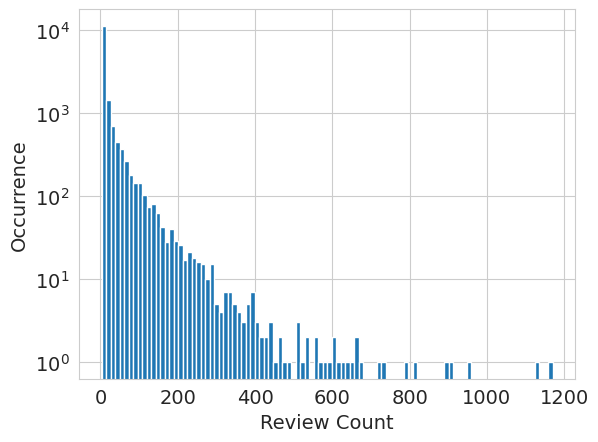

In [3]:
# レビュー件数とヒストグラムを描画
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

### 例2-3. 固定幅によるカウントの離散化

In [4]:
import numpy as np

np.random.seed(seed=1)

# 0から99までの整数を一様分布からランダムに20個生成する
small_counts = np.random.randint(0, 100, 20)

small_counts

array([37, 12, 72,  9, 75,  5, 79, 64, 16,  1, 76, 71,  6, 25, 50, 20, 18,
       84, 11, 28])

In [5]:
# 除算により 0-9 までの階級を割り当てる
np.floor_divide(small_counts, 10)

array([3, 1, 7, 0, 7, 0, 7, 6, 1, 0, 7, 7, 0, 2, 5, 2, 1, 8, 1, 2])

In [6]:
# 複数の桁にまたがるカウントデータの配列
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 
                44, 28, 7971, 926, 122, 22222]
# 対数変換により指数幅の階級を割り当てる
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

### 例2-4.  Yelp ビジネスレビュー件数の十分位数を計算する

In [7]:
# Yelpデータセットにおけるレビュー件数の十分位数を計算
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
deciles

0.1     3.0
0.2     3.0
0.3     4.0
0.4     5.0
0.5     6.0
0.6     8.0
0.7    13.0
0.8    24.0
0.9    56.0
Name: review_count, dtype: float64

Text(0, 0.5, 'Occurrence')

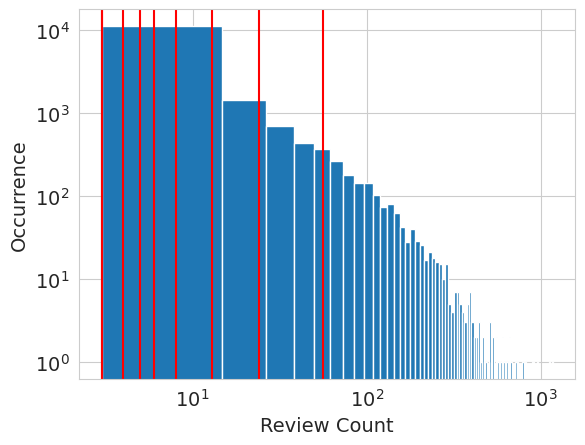

In [8]:
# ヒストグラムに十分位数を上書きする
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

### 例2-5. 分位数によるカウントの離散化

In [9]:
import pandas as pd

# 四分位数に変換
pd.qcut(large_counts, 4, labels=False)

array([1, 2, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 2, 1, 0, 3])

In [10]:
# 分位数の計算
large_counts_series = pd.Series(large_counts)
large_counts_series.quantile([0.25, 0.5, 0.75])

0.25     122.0
0.50     926.0
0.75    8286.0
dtype: float64

## 2.3 対数変換

### 例2-6. 対数変換の前後でレビュー件数のヒストグラムを比較する

Text(0, 0.5, 'Occurrence')

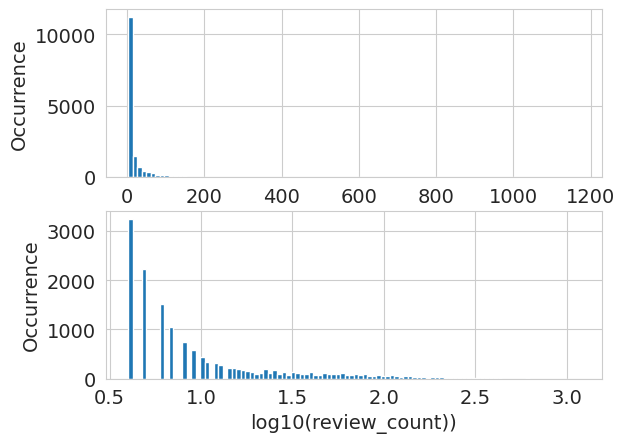

In [11]:
import numpy as np

# 例2-2で読み込んだ Yelp データセットの
# データフレーム biz_df を使用して、レビュー件数を対数変換する。
# レビュー件数 0 を対数変換してマイナス無限大になるのを防ぐために
# 対数変換の前に生データに 1 を加算していることに注意。
biz_df['log_review_count'] = np.log10(biz_df['review_count'] + 1)

fig, (ax1, ax2) = plt.subplots(2,1)
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('review_count', fontsize=14)
ax1.set_ylabel('Occurrence', fontsize=14)

biz_df['log_review_count'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('log10(review_count))', fontsize=14)
ax2.set_ylabel('Occurrence', fontsize=14)

### 例2-7. ニュース記事に含まれる単語数の分布の可視化

In [13]:
import pandas as pd
import numpy as np

# Online News Popularity データセットを UCI リポジトリからダウンロードし、
# Pandas を使ってデータフレームとして読み込む。
df = pd.read_csv('../data/OnlineNewsPopularity.csv', delimiter=', ', engine='python')

# ニュース記事に含まれる単語数 'n_tokens_content' に対数変換を施す
df['log_n_tokens_content'] = np.log10(df['n_tokens_content'] + 1)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_n_tokens_content
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,2.342423
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2.408240
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,2.326336
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,2.725912
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,3.030600


Text(0, 0.5, 'Number of Articles')

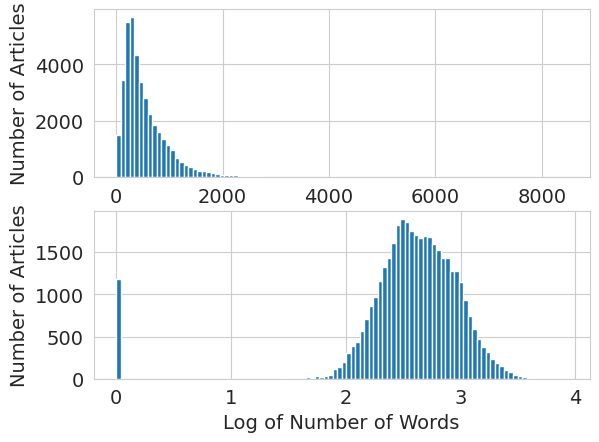

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

fig, (ax1, ax2) = plt.subplots(2,1)
df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Articles', fontsize=14)

df['log_n_tokens_content'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Number of Words', fontsize=14)
ax2.set_ylabel('Number of Articles', fontsize=14)

### 例2-8. 平均評価を予測するためにYelpレビュー件数の対数変換を使う

In [18]:
import pandas as pd
import numpy as np
import json
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

with open('../data/yelp_academic_dataset_business.json') as biz_file:
    biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
    
# 例2-2で読み込んだ Yelp データセットの
# データフレーム biz_df を使用して、レビュー件数を対数変換する。
# レビュー件数 0 を対数変換してマイナス無限大になるのを防ぐために
# 対数変換の前に生データに 1 を加算していることに注意。
biz_df['log_review_count'] = np.log10(biz_df['review_count'] + 1)
biz_df.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type,log_review_count
0,O_X3PGhk3Y5JWVi866qlJg,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",True,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,29,Turf Paradise Race Course,[],-112.092329,AZ,4.0,33.638573,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...",business,1.477121
1,QbrM7wqtmoNncqjc6GtFaQ,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},True,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,3,Sam's Club Members Only,[],-112.234755,AZ,3.5,33.648545,"{'Parking': {'garage': False, 'street': False,...",business,0.602060
2,7lbvsGKzhjuX3oJtaXJvOg,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",True,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,7,Forever 21,[],-111.964485,AZ,3.5,33.383123,"{'Parking': {'garage': False, 'street': False,...",business,0.903090
3,gjxoKVsRJwEoa8zd9XxlAw,"912 W Sycamore Pl\nChandler, AZ 85225","{'Monday': {'close': '19:00', 'open': '06:00'}...",True,"[Pet Services, Pet Boarding/Pet Sitting, Pets]",Chandler,4,Loving Hands Pet Care,[],-111.857818,AZ,5.0,33.356472,{},business,0.698970
4,V28yjMqyZnbCtabroJN_aA,"1745 W Glendale Ave\nPhoenix, AZ 85021",{},True,"[Veterinarians, Pets]",Phoenix,3,Amec Mid-City Animal Hospital,[],-112.097232,AZ,5.0,33.538493,{},business,0.602060


In [19]:
# 各店舗の平均評価（stars）を予測するために線形回帰モデルを学習する。
# 特徴量 review_count を対数変換した場合としない場合とで
# 10分割クロスバリデーションにより R2 スコアを比較する。
m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, biz_df[['review_count']],
                              biz_df['stars'], cv=10)
m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, biz_df[['log_review_count']],
                             biz_df['stars'], cv=10)
print('R-squared score without log transform: %0.5f (+/- %0.5f)' % (scores_orig.mean(), scores_orig.std() * 2))
print('R-squared score with log transform: %0.5f (+/- %0.5f)' % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: 0.00179 (+/- 0.00417)
R-squared score with log transform: 0.00069 (+/- 0.00585)


### 例2-9. Online News Popularity データセットの記事の人気を予測するために単語数を対数変換する

In [20]:
# Online News Popularity データセットを UCI リポジトリからダウンロードし、
# Pandas を使ってデータフレームとして読み込む。
df = pd.read_csv('../data/OnlineNewsPopularity.csv', delimiter=', ', engine='python')

# ニュース記事内に含まれる単語数 'n_tokens_content' に対数変換を施す
df['log_n_tokens_content'] = np.log10(df['n_tokens_content'] + 1)

# 記事のシェア数を予測する2つの線形回帰モデルを学習する。
# 1つは元の特徴量であり、もう1つは対数変換をかけた特徴量を使う。
m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, df[['n_tokens_content']],
                              df['shares'], cv=10)
m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, df[['log_n_tokens_content']],
                             df['shares'], cv=10)
print('R-squared score without log transform: %0.5f (+/- %0.5f)'
      % (scores_orig.mean(), scores_orig.std() * 2))
print('R-squared score with log transform: %0.5f (+/- %0.5f)'
      % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: -0.00242 (+/- 0.00509)
R-squared score with log transform: -0.00114 (+/- 0.00418)


### 例2-10. ニュース記事の人気予測問題における入出力間の相関の可視化

Text(0, 0.5, 'Number of Shares')

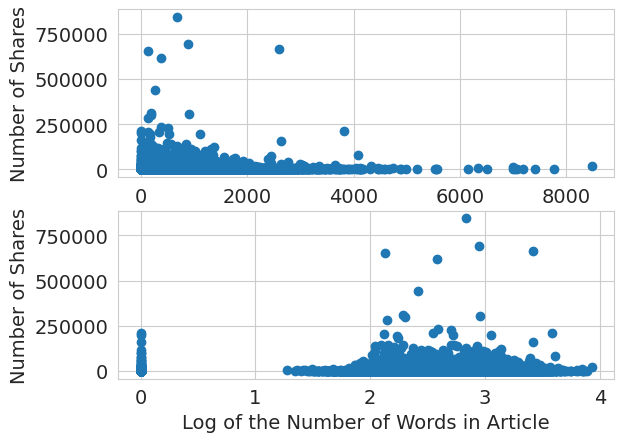

In [21]:
fig2, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(df['n_tokens_content'], df['shares'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Shares', fontsize=14)

ax2.scatter(df['log_n_tokens_content'], df['shares'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of the Number of Words in Article', fontsize=14)
ax2.set_ylabel('Number of Shares', fontsize=14)

### 例2-11. Yelp評価予測における入力と出力の相関の可視化

Text(0, 0.5, 'Average Star Rating')

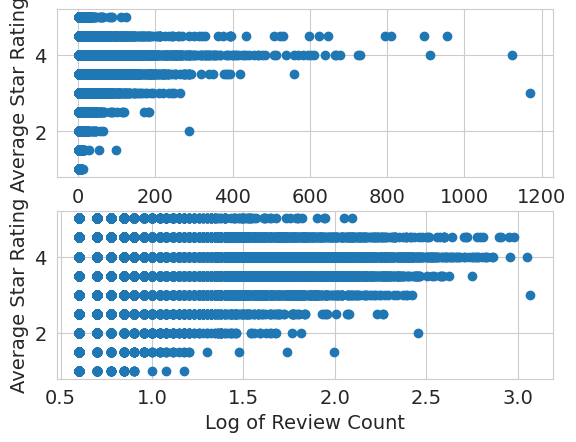

In [22]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(biz_df['review_count'], biz_df['stars'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Review Count', fontsize=14)
ax1.set_ylabel('Average Star Rating', fontsize=14)

ax2.scatter(biz_df['log_review_count'], biz_df['stars'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Review Count', fontsize=14)
ax2.set_ylabel('Average Star Rating', fontsize=14)

### 例2-12. Yelpレビュー件数の Box-Cox 変換

In [23]:
from scipy import stats

# 引き続き biz_df には Yelp のレビューデータが含まれるとする。
# Box-Cox 変換は入力がすべて正であることを仮定するため、
# まずは最小値を調べてマイナスの値を取らないか確認する。
# Check the min to make sure.
biz_df['review_count'].min()

3

In [24]:
# 引数 lambda に 0 を与えると対数変換になる（定数を足さない）
rc_log = stats.boxcox(biz_df['review_count'], lmbda=0)
# 引数 lambda に何も与えなければ、scipy 実装では変換後のデータが
# 正規分布に最も近づくようにパラメータ lambda が自動的に決定される
rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
bc_params

-0.5408564170702835

### 例2-13. レビュー件数の元データ、対数変換後、Box-Cox変換後のヒストグラムを作成

Text(0, 0.5, 'Occurrence')

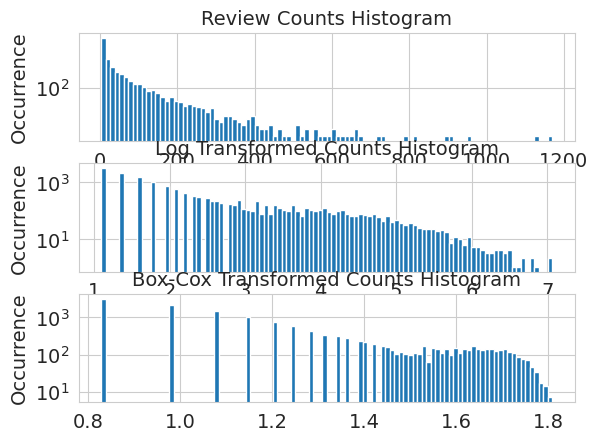

In [25]:
biz_df['rc_log'] = rc_log
biz_df['rc_bc'] = rc_bc

fig, (ax1, ax2, ax3) = plt.subplots(3,1)
# レビュー件数のヒストグラム
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# 対数変換後のレビュー件数のヒストグラム
biz_df['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

# 最適な Box-Cox 変換後のレビュー件数のヒストグラム
biz_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

### 例2-14. 元データと変換後データの正規分布に対する確率プロット

Text(0.5, 1.0, 'Probplot after Box-Cox transform')

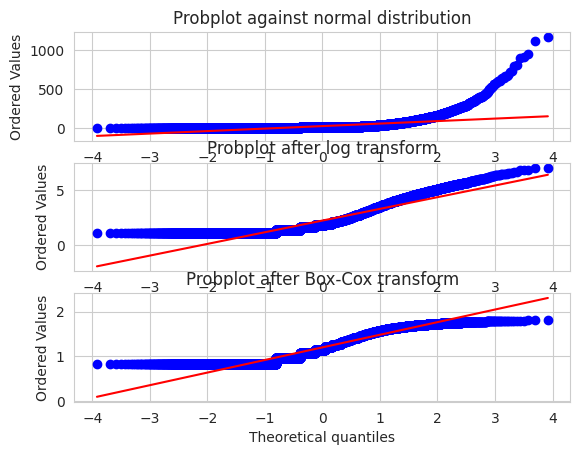

In [26]:
fig2, (ax1, ax2, ax3) = plt.subplots(3,1)
prob1 = stats.probplot(biz_df['review_count'], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

prob2 = stats.probplot(biz_df['rc_log'], dist=stats.norm, plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after log transform')

prob3 = stats.probplot(biz_df['rc_bc'], dist=stats.norm, plot=ax3)
ax3.set_xlabel('Theoretical quantiles')
ax3.set_title('Probplot after Box-Cox transform')

## 2.4 スケーリングと正規化

### 例2-15. 特徴量スケーリングの例

In [27]:
import pandas as pd
import sklearn.preprocessing as preproc

# Online News Popularity データセットの読み込み
df = pd.read_csv('../data/OnlineNewsPopularity.csv', delimiter=', ', engine='python')

# 元データ（記事中の単語数）
df['n_tokens_content'].values

array([219., 255., 211., ..., 442., 682., 157.])

In [28]:
# Min-Max スケーリング
df['minmax'] = preproc.minmax_scale(df[['n_tokens_content']])
df['minmax'].values

array([0.02584376, 0.03009205, 0.02489969, ..., 0.05215955, 0.08048147,
       0.01852726])

In [29]:
# 標準化（定義より出力が負になることもある）
df['standardized'] = preproc.StandardScaler().fit_transform(df[['n_tokens_content']])
df['standardized'].values

array([-0.69521045, -0.61879381, -0.71219192, ..., -0.2218518 ,
        0.28759248, -0.82681689])

In [30]:
# L2 正規化
df['l2_normalized'] = preproc.normalize(df[['n_tokens_content']], axis=0)
df['l2_normalized'].values

array([0.00152439, 0.00177498, 0.00146871, ..., 0.00307663, 0.0047472 ,
       0.00109283])

### 例2-16. 元データとスケーリング後のヒストグラムの描画

Text(42.722222222222214, 0.5, 'Number of articles')

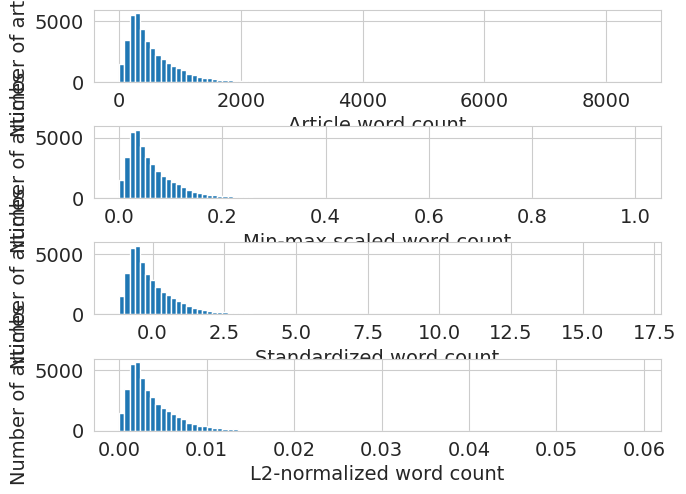

In [31]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1)
fig.tight_layout()
df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
ax2.set_ylabel('Number of articles', fontsize=14)

df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
ax3.set_ylabel('Number of articles', fontsize=14)

df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
ax4.set_ylabel('Number of articles', fontsize=14)

## 2.5 交互作用特徴量

### 例2-17. 交互作用特徴量を使った予測の例

In [33]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preproc

df = pd.read_csv('../data/OnlineNewsPopularity.csv', delimiter=', ', engine='python')
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [34]:
features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
            'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
            'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
            'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment',
            'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
            'data_channel_is_world']

X = df[features]
y = df[['shares']]

# ペアワイズ交互作用特徴量を作成する（定数項（bias）は含めない）
X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X)
X2.shape

(39644, 170)

In [35]:
# 両方の特徴量セットを訓練データとテストデータに分ける
X1_train, X1_test, X2_train, X2_test, y_train, y_test = \
    train_test_split(X, X2, y, test_size=0.3, random_state=123)

def evaluate_feature(X_train, X_test, y_train, y_test):
    """
    訓練データに対して線形回帰モデルを適合し
    テストデータに対してスコアを算出する
    """
    model = linear_model.LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

# それぞれの特徴量に対してモデルを学習し、テストスコアを算出する
(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)
print("R-squared score with singleton features: %0.5f" % r1)
print("R-squared score with pairwise features: %0.10f" % r2)

R-squared score with singleton features: 0.00924
R-squared score with pairwise features: 0.0113239378
